In [32]:
import pandas as pd
import numpy as np
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
df.shape

(400, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.drop('Serial No.', axis=1, inplace=True)



In [18]:
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [19]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - val_loss: 0.0033
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

In [27]:
model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.6266554 ],
       [0.68099666],
       [0.9216299 ],
       [0.80734426],
       [0.5638593 ],
       [0.9042696 ],
       [0.5825528 ],
       [0.4888266 ],
       [0.63398385],
       [0.8460854 ],
       [0.67146033],
       [0.8977958 ],
       [0.5221608 ],
       [0.86883426],
       [0.60353386],
       [0.700256  ],
       [0.6371243 ],
       [0.4952919 ],
       [0.69021636],
       [0.9434533 ],
       [0.5978288 ],
       [0.6267921 ],
       [0.67529535],
       [0.55503106],
       [0.90828824],
       [0.80277956],
       [0.68018544],
       [0.59509706],
       [0.6777564 ],
       [0.80841315],
       [0.7809651 ],
       [0.91264385],
       [0.66565007],
       [0.40435222],
       [0.6454155 ],
       [0.64212793],
       [0.71173316],
       [0.6415973 ],
       [0.6076508 ],
       [0.8567434 ],
       [0.73153293],
       [0.5758356 ],
       [0.761577  ],
       [0.9290054 ],
       [0.84203434],
       [0.8197161 ],
       [0.9431398 ],
       [0.656

In [29]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054
Test Loss: 0.0046


In [30]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R² Score: 0.8217


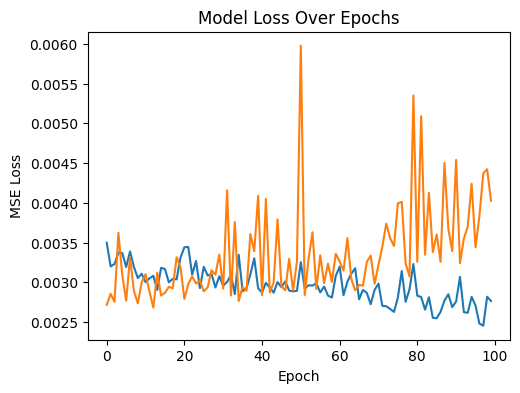

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

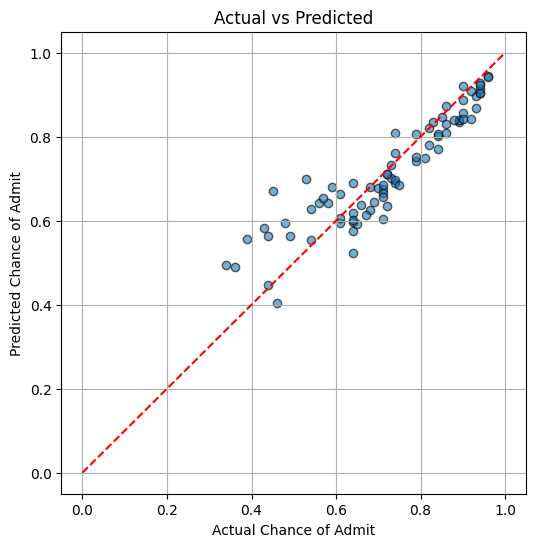

In [38]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

In [40]:
import gradio as gr
def predict_admit(gre, toefl, rating, sop, lor, cgpa, research):
    input_data = np.array([[gre, toefl, rating, sop, lor, cgpa, research]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0][0]
    return f"{prediction:.2f}"

interface = gr.Interface(
    fn=predict_admit,
    inputs=[
        gr.Slider(260, 340, step=1, label="GRE Score"),
        gr.Slider(90, 120, step=1, label="TOEFL Score"),
        gr.Slider(1, 5, step=1, label="University Rating"),
        gr.Slider(1.0, 5.0, step=0.5, label="SOP Strength"),
        gr.Slider(1.0, 5.0, step=0.5, label="LOR Strength"),
        gr.Slider(6.0, 10.0, step=0.1, label="CGPA"),
        gr.Radio([0, 1], label="Research Experience (0 = No, 1 = Yes)")
    ],
    outputs="text",
    title="🎓 Graduate Admission Predictor",
    description="Enter your academic profile to estimate your chance of admission to a graduate program."
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ded3f7b19bf45fa59b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
